# Gramener Data Science Entry Level Position Use Case 1

## Introduction

For use case 1, we're examining the National Acheivement Survey for class VIII students from 2014. In an effort to answer the following questions - 
1. What influences student performance the most?
2. How do girls and boys perform across states?
3. Do students from South India really excel at Math and Science


In [16]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
datapath = './'
filename = 'nas-pupil-marks.csv'
Data = pd.read_csv(datapath+filename)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185348 entries, 0 to 185347
Data columns (total 64 columns):
STUID                     185348 non-null int64
State                     185348 non-null object
District                  185348 non-null int64
Gender                    185348 non-null int64
Age                       185348 non-null int64
Category                  185348 non-null int64
Same language             185348 non-null int64
Siblings                  185348 non-null int64
Handicap                  185348 non-null int64
Father edu                185348 non-null int64
Mother edu                185348 non-null int64
Father occupation         185348 non-null int64
Mother occupation         185348 non-null int64
Below poverty             185348 non-null int64
Use calculator            185348 non-null int64
Use computer              166186 non-null object
Use Internet              185348 non-null int64
Use dictionary            185348 non-null int64
Read other books       


## Data Cleaning

From our info function, we can see there are a few null entries in our dataset, thus it becomes important to try and handle those first. The rows which have the most nulls are our metrics of performance, the maths, science, social science and reading scores.  

In [18]:
NullsDropped = Data.dropna(axis=0,how='all',inplace=False)
NullsDropped.shape

(185348, 64)

Immediately, there are no rows such that all values are null.
The fact that our nulls are in our target variables, presents a problem as we can't easily replace them with a statistical measure without tainting the spread of features.  

Dropping all the rows with nulls would also not be ideal, as we'd reduce our current number of data points by ~96% as is evidenced below. 

In [19]:
NullsDropped = Data.dropna(axis=0,how='any',inplace=False)
NullsDropped.shape

(8044, 64)

In order to preserve the majority of our dataset, we split our target variables - we seperate our current dataset to 5 different ones, one each for our four performance metrics and one for Maths and Science. 

Moreover, our dataset also has zeroes in our dataset for columns that don't have valid 0 levels. This also needs to be fixed. 

In [20]:
Maths = Data.drop(['Reading %','Science %','Social %'],axis=1)

Similarly, we create a dataset for each metric of performance

In [21]:
Reading = Data.drop(['Maths %','Science %','Social %'],axis=1)
Science = Data.drop(['Maths %','Reading %','Social %'],axis=1)
Social = Data.drop(['Maths %','Reading %','Science %'],axis=1)
Maths_and_Science = Data.drop(['Reading %','Social %'],axis=1)

In [22]:
filename = 'nas-labels.csv'
labels = pd.read_csv(datapath+filename)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Column    241 non-null object
Name      241 non-null object
Level     241 non-null object
Rename    241 non-null object
dtypes: object(4)
memory usage: 7.6+ KB


In [23]:
# We use the labels.csv file to figure out which columns in our dataset are allowed to be 0

zero_allowed = pd.DataFrame(labels.loc[labels['Level'].astype(str) == '0']) 

#Slightly janky, but I didn't want to drop the states and can't convert characters to base 10 ints implicitly.

zero_allowed = zero_allowed['Column'].tolist()


#Gives me the list of the columns which shouldn't have zeroes. 
def remove_zeroes(df):
    '''Helper function that first removes nulls and then removes 0's from rows that shouldn't have zeroes.'''
    df.dropna(axis=0,how='any',inplace=True)
    zero_not_allowed = [item for item in df.columns.values.tolist() if item not in zero_allowed]
    df = df.replace(0,np.nan) 
    #Since the dropna function has a subset parameter, casting 0's to  np.nan 
    
    df.dropna(axis =0, how='any',inplace=True,subset = zero_not_allowed)
    df.fillna(value=0,inplace=True)
    
    #Convert object types to categories and categories to cat codes. 
    objects = df.select_dtypes(include=['O']).columns.tolist()
    for col in objects:
        df[col] = df[col].astype('category')
    
    return df

In [24]:
Maths=remove_zeroes(Maths)
Science=remove_zeroes(Science)
Social=remove_zeroes(Social)
Reading=remove_zeroes(Reading)
Maths_and_Science=remove_zeroes(Maths_and_Science)
NullsDropped=remove_zeroes(NullsDropped)


/home/karmanya/anaconda3/envs/MLIntel/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Finally we should take the average of the performance metrics for the frames with multiple metrics

In [25]:
## Maths and Science
Maths_and_Science['Avg %'] = (Maths_and_Science['Maths %']+Maths_and_Science['Science %'])/2
Maths_and_Science.drop(['Maths %','Science %'],axis=1,inplace=True)

NullsDropped['Avg %'] = (NullsDropped['Maths %']+NullsDropped['Science %']+NullsDropped['Social %']+NullsDropped['Reading %'])/4
NullsDropped.drop(['Maths %','Science %','Social %','Reading %'],axis=1,inplace=True)

In [26]:
Science.isnull().values.any()

False

In [27]:
Maths.describe()

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Observe experiments,Conduct experiments,Solve science problems,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %
count,5.054200e+04,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,...,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000,50542.000000
mean,2.714830e+10,5.114222,1.520894,3.644870,2.654901,1.305647,3.465039,1.895374,2.213090,1.885363,...,2.646769,2.082941,2.426833,2.349828,3.556587,3.168850,3.096019,3.445333,3.511456,32.903478
std,9.808741e+09,4.030791,0.499568,0.946113,1.211942,0.531592,1.209956,0.380640,1.222056,1.176629,...,0.692864,0.930929,0.813011,0.822457,0.798879,1.017827,0.922589,0.882576,1.012895,15.862777
min,1.101100e+10,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.670000
25%,1.808118e+10,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,22.030000
50%,2.607110e+10,4.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,28.810000
75%,3.601103e+10,7.000000,2.000000,4.000000,4.000000,2.000000,5.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,38.980000
max,4.502103e+10,28.000000,2.000000,6.000000,4.000000,2.000000,5.000000,2.000000,5.000000,5.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,100.000000


We can see now that our datasets are relatively clean. This has resulted in a rather large reduction in our dataset - each of our target variables has approximately 30% of the total samples which is less than ideal, but it's perhaps the safest way to ensure there's no tainting of our data. 

## Exploring Student Performance

The First Question, attempts to answer which of the features affect student performance the most. We can examine both linear and non linear correlations using various feature selection techniques. First via a correlation matrix and then using random forests for feature selection. 

In [28]:
def correlation_matrix(df,target):
    '''Helper function for correlation matrix'''
    k = 10 #number of variables for heatmap
    corrmat = df.corr() #Create a correlation matrix
    cols = corrmat.nlargest(k, target)[target].index #Find the 10 highest correlations
    cm = np.corrcoef(df[cols].values.T)
    fig, ax = plt.subplots() #Plot this as a heatmap
    fig.set_size_inches(10,8)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, \
                     yticklabels=cols.values, xticklabels=cols.values,ax=ax)
    plt.show()



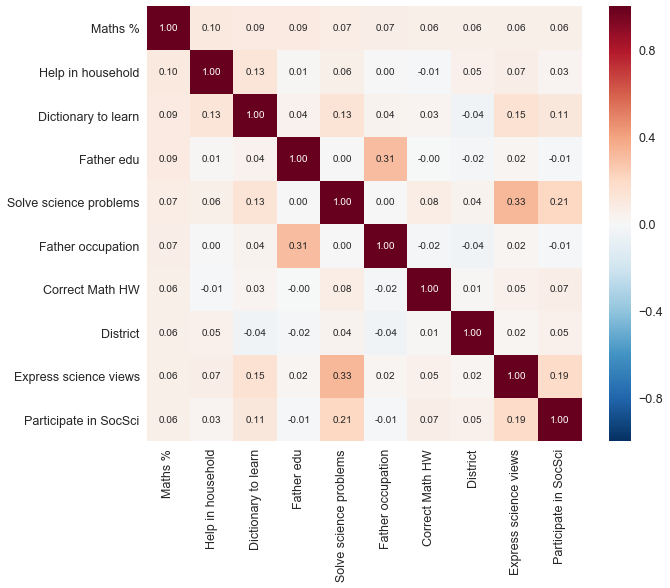

In [29]:
correlation_matrix(Maths,'Maths %')

We can see from the plot that the Father's Education is quite important, as is the presence of a Dictionary, the extent to which they help in the household and the work they put into doing their homework. 

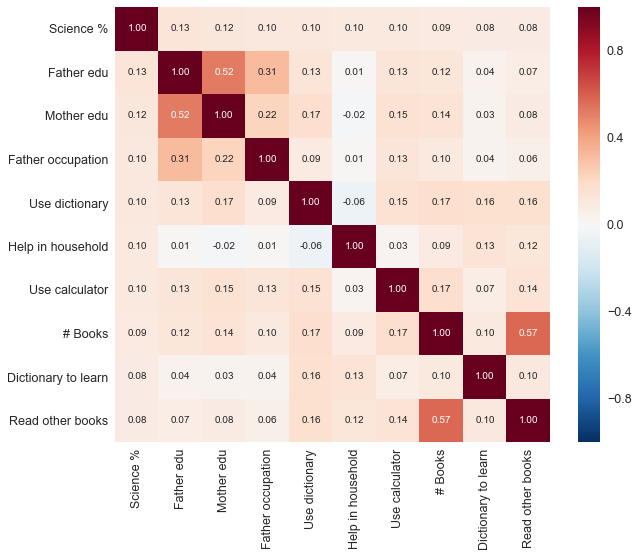

In [30]:
correlation_matrix(Science,'Science %')

Again, Father's Education, and Mother's Education show up as important features, as does the presence of having a dictionary and the extent to which they help in the household. How much they read, also plays an important role

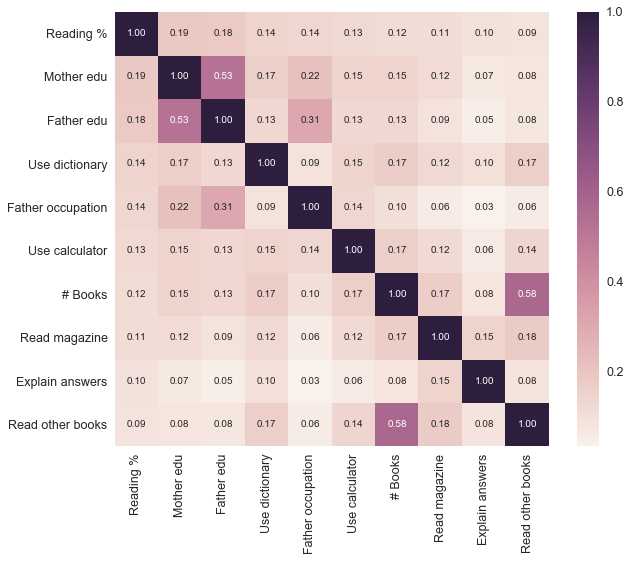

In [31]:
correlation_matrix(Reading,'Reading %')

Unsurprisingly, the extent to which people read either magazines, other books etc are important towards their Reading ability. The dictionary and the parent's education is also important. 

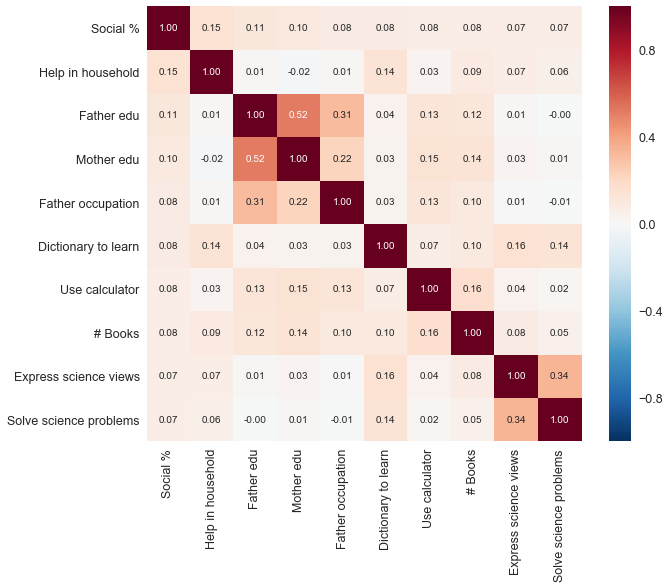

In [32]:
correlation_matrix(Social,'Social %')

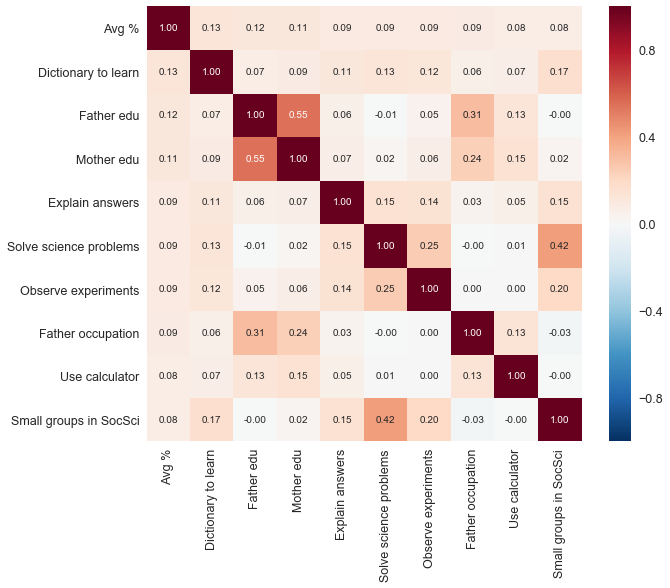

In [33]:
correlation_matrix(Maths_and_Science,'Avg %')

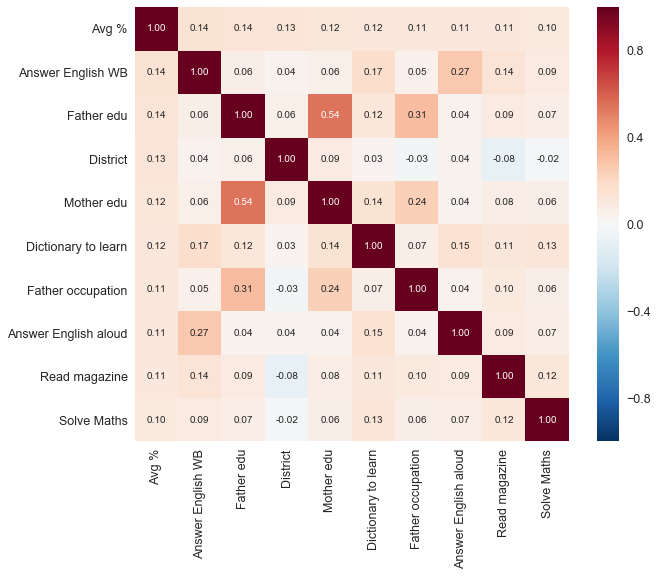

In [34]:
correlation_matrix(NullsDropped,'Avg %')

#### Analysis
In terms of a linear correlation of features, across all the datasets, the parent's education and the ability to read a dictionary  is very important. How much effort the student puts in towards studies, whether it's in solving maths problems, explaining science answers, reading books and magazines, are all very important. Hard work does pay off apparently. 

Now we should attempt to check for non linear correlations - 

In [35]:
from sklearn.ensemble import RandomForestRegressor
Mcopy = Maths.copy()
cat_columns = Mcopy.select_dtypes(['category']).columns
Mcopy[cat_columns] = Mcopy[cat_columns].apply(lambda x: x.cat.codes) #Encoding Categories for the Random Forests 
features = Mcopy.drop('Maths %',axis=1)
target = Mcopy['Maths %']
tree = RandomForestRegressor()
tree.fit(features,target)
sorted(zip(tree.feature_importances_,Mcopy.columns.values),reverse=True)[:10]

[(0.16741771951059425, 'STUID'),
 (0.045822058846183962, 'State'),
 (0.043747338741231746, 'District'),
 (0.029811571045266709, 'Computer use'),
 (0.026936486831861457, 'Father occupation'),
 (0.026748832874502877, 'Father edu'),
 (0.024952413896465034, 'Mother occupation'),
 (0.024674615988126355, 'Library use'),
 (0.024400337640052634, 'Mother edu'),
 (0.022614412104687547, 'Siblings')]

#### Analysis
The non linear correlations follow the linear ones, so there isn't much reason to do this for each dataset. 

## Girls vs Boys Across States
So, lets start by a simple metric, looking at the average of scores of boys and girls

In [36]:
def split_girl_boy(df,target):
    boys=df.loc[df['Gender']==1].groupby('State',as_index=False)[target].mean()
    girls=df.loc[df['Gender']==2].groupby('State',as_index=False)[target].mean()
    return (boys,girls)

In [37]:
(boys_maths_score,girls_maths_score) = split_girl_boy(Maths,'Maths %')
(boys_science_score,girls_science_score) = split_girl_boy(Science,'Science %')
(boys_reading_score,girls_reading_score) = split_girl_boy(Reading,'Reading %')
(boys_social_score,girls_social_score) = split_girl_boy(Social,'Social %')
(boys_mathsandscience_score,girls_mathsandscience_score) = split_girl_boy(Maths_and_Science,'Avg %')
(boys_overall_score,girls_overall_score) = split_girl_boy(NullsDropped,'Avg %')

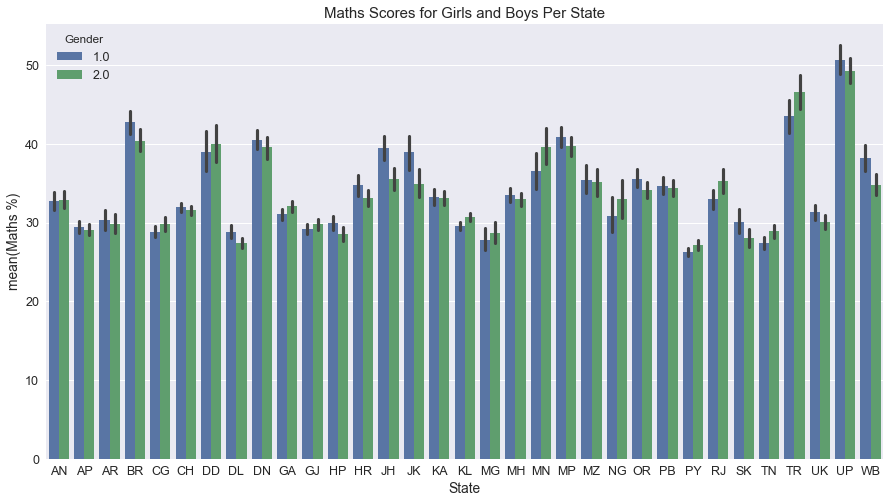

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Maths %',hue='Gender',data=Maths, ax=ax)\
.set_title("Maths Scores for Girls and Boys Per State")
plt.show()

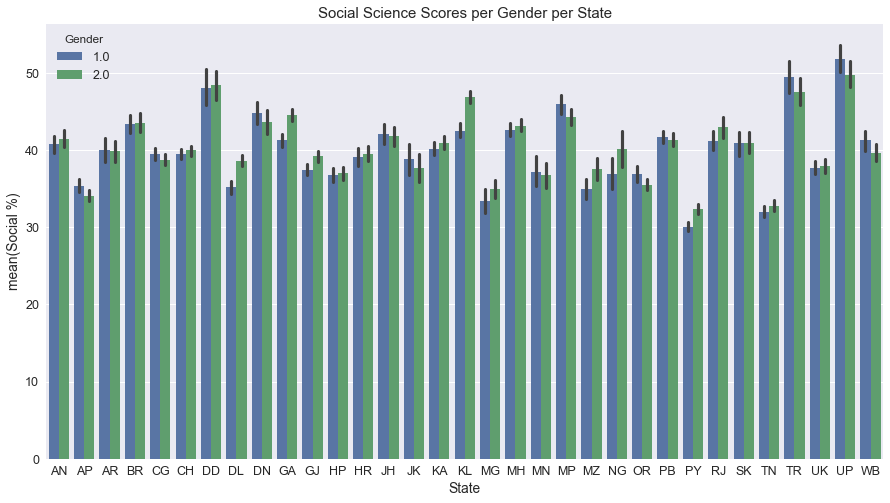

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Social %',hue='Gender',data=Social, ax=ax)\
.set_title("Social Science Scores per Gender per State")
plt.show()

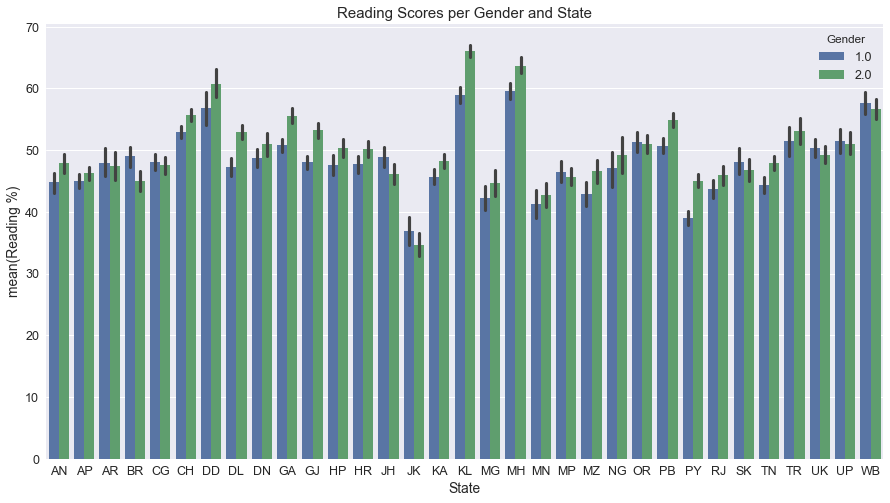

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Reading %',hue='Gender',data=Reading, ax=ax)\
.set_title("Reading Scores per Gender and State")
plt.show()

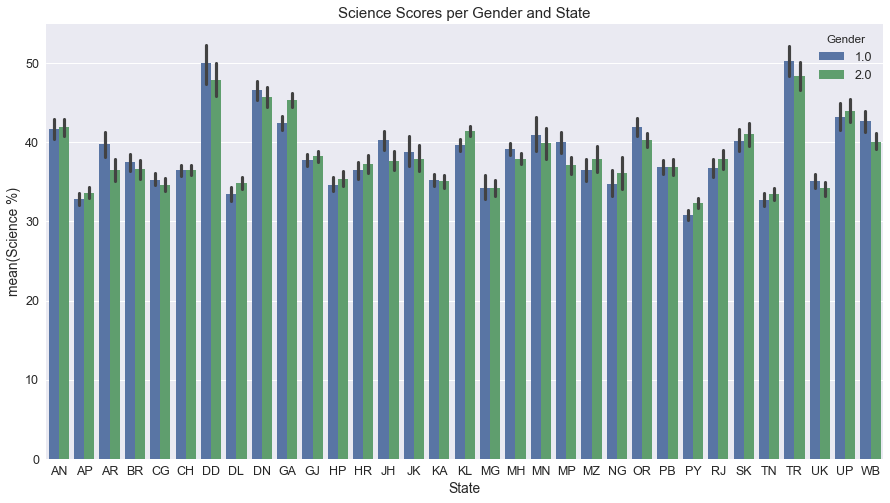

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Science %',hue='Gender',data=Science, ax=ax)\
.set_title("Science Scores per Gender and State")
plt.show()

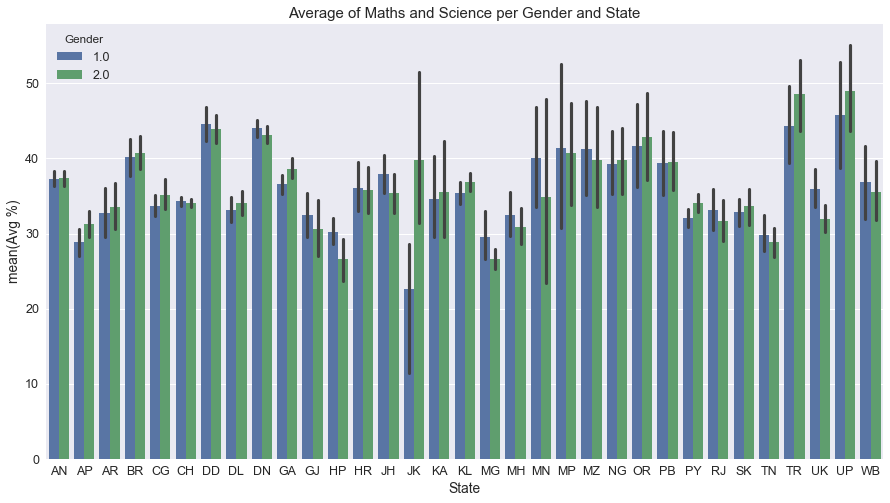

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Avg %',hue='Gender',data=Maths_and_Science, ax=ax)\
.set_title("Average of Maths and Science per Gender and State")
plt.show()

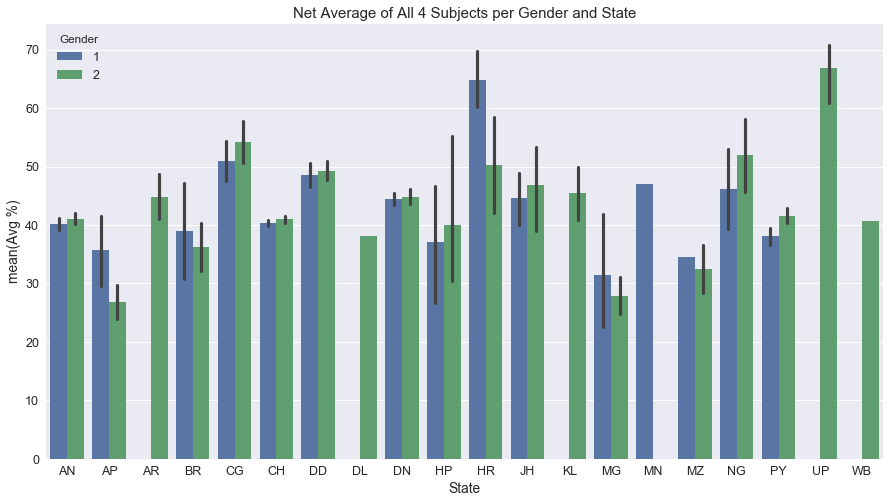

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.barplot(x='State',y='Avg %',hue='Gender',data=NullsDropped, ax=ax)\
.set_title("Net Average of All 4 Subjects per Gender and State")
plt.show()

#### Analysis
Primarily, we can see that girls and boys have fairly comparable performance, except in certain standout cases. 
In maths for example, except for a few standout states, girls and boys do about the same. However, in Science, boys seem to do a lot better. 
Which is perhaps why Maths and Science shows the same trend as Science. Conversely girls do a lot better than boys in both reading and social science. Our data seems to back up commonly held stereotypes. 
As somewhat expected just taking an average of all three is such a small dataset that it doesn't seem worth to try and extrapolate information from. 
Contrary to most stereotypes, students from UP score very highly relative to other states. 
Students in Kerala perform significantly better than most other states in Reading, which lends some credence to the notion that Kerala has the highest literacy rates. 
Tripura and Daman and Diu have the best Science scores
Overall, across all states, ther average scores in Maths, Social Sciences and Science are roughly similar, and significantly lower than Reading scores. 
Just to get a better idea of the distribution marks over all the states, lets plot some distributions

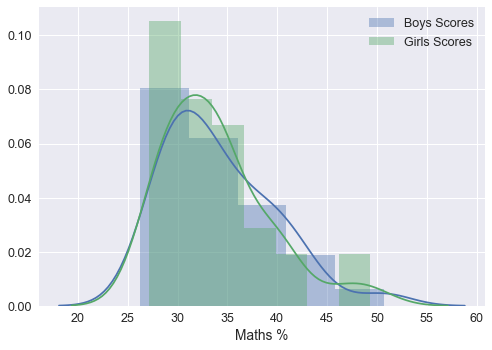

In [44]:
fig, ax = plt.subplots()
sns.distplot(a=boys_maths_score['Maths %'],ax=ax,label='Boys Scores')
sns.distplot(a=girls_maths_score['Maths %'],ax=ax,label='Girls Scores')
ax.legend()
plt.show()

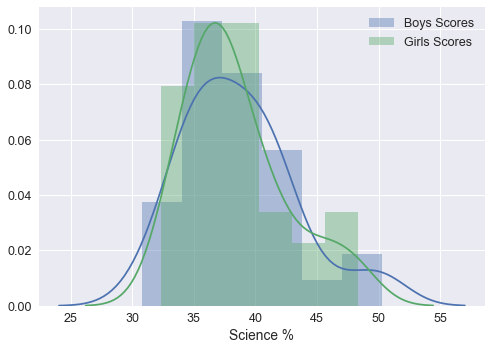

In [45]:
fig, ax = plt.subplots()
sns.distplot(a=boys_science_score['Science %'],ax=ax,label='Boys Scores')
sns.distplot(a=girls_science_score['Science %'],ax=ax,label='Girls Scores')
ax.legend()
plt.show()

This is probably the only dataset where girls do significantly worse in terms of performance. Just looking at the peak around the 35-40% average score for girls across states is indicative of the fact that girls don't have the best marks in science. 

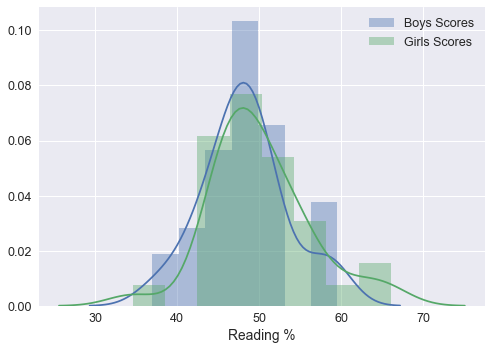

In [46]:
fig, ax = plt.subplots()
sns.distplot(a=boys_reading_score['Reading %'],ax=ax,label='Boys Scores')
sns.distplot(a=girls_reading_score['Reading %'],ax=ax, label='Girls Scores')
ax.legend()
plt.show()

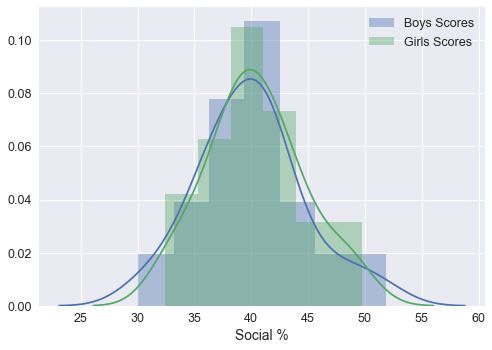

In [47]:
fig, ax = plt.subplots()
sns.distplot(a=boys_social_score['Social %'],ax=ax,label='Boys Scores')
sns.distplot(a=girls_social_score['Social %'],ax=ax,label='Girls Scores')
ax.legend()
plt.show()

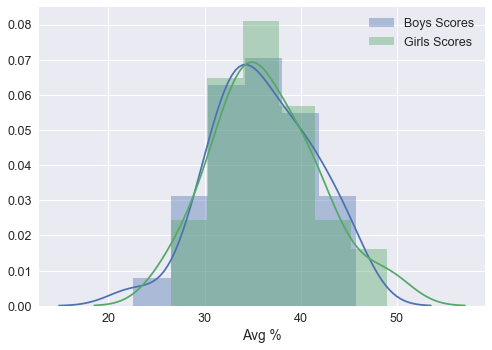

In [48]:
fig, ax = plt.subplots()
sns.distplot(a=boys_mathsandscience_score['Avg %'],ax=ax,label='Boys Scores')
sns.distplot(a=girls_mathsandscience_score['Avg %'],ax=ax,label='Girls Scores')
ax.legend()
plt.show()

#### Analysis
Looking at the average score of the math and science scores for girls and boys across all states, it seems like they seems to perform similarly, despite the fact that girls do relatively worse in science. Girls do significantly better in Reading, and slightly better in Social Science subjects. 

## Examining Performance for South Indian States
For this final question, we transform our dataset slightly. We already have some small idea about this is, as in our state wise plots we could see certain states do significantly better than others in certain subjects. let's change our levels for the state column by manufacturing another feature which aggregates whether people are in South Indian States or not. 
South Indian States and their respective labels in our dataset are-
1. Andaman and Nicobar (AN)
2. Andhra Pradesh (AP)
3. Karnataka (KA)
4. Kerala (KL)
5. Puducherry (PY)
6. Tamil Nadu (TN)
7. Telangana -Not in Dataset
8. Lakshwadeep -Not in Dataset



Then we can use the same charts as we did previously to try and answer this question.


In [49]:
def create_south_indian_column(df):
    south_indian_states = ['AN','AP','KA','KL','PY','TN']
    df['South Indian'] = [1 if x in south_indian_states else 0 for x in df['State']]
    return df

In [50]:
Maths = create_south_indian_column(Maths)
Science = create_south_indian_column(Science)
Maths_and_Science = create_south_indian_column(Maths_and_Science)
Reading = create_south_indian_column(Reading)
Social = create_south_indian_column(Social)

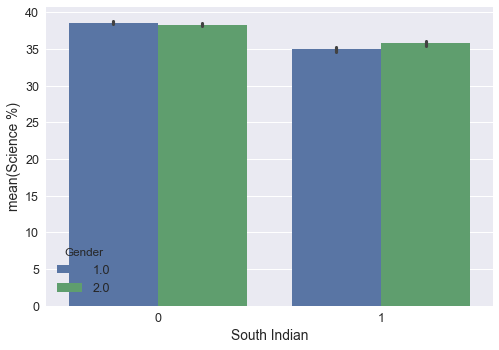

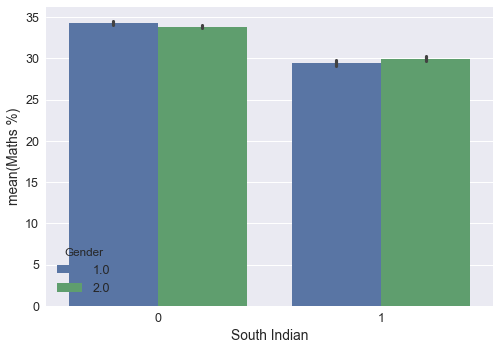

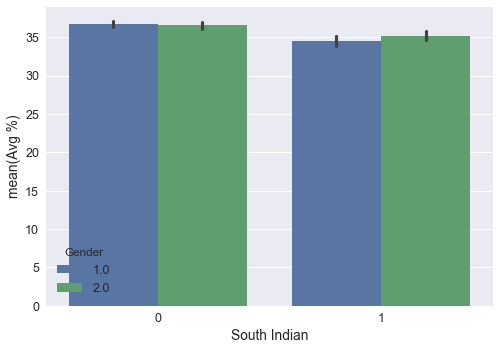

In [51]:
fig, ax = plt.subplots()
sns.barplot(x='South Indian',y='Science %',hue='Gender',data=Science, ax=ax)
plt.show()
fig, ax = plt.subplots()
sns.barplot(x='South Indian',hue='Gender',y='Maths %',data=Maths, ax=ax)
plt.show()
fig, ax = plt.subplots()
sns.barplot(x='South Indian',hue='Gender',y='Avg %',data=Maths_and_Science, ax=ax)
plt.show()


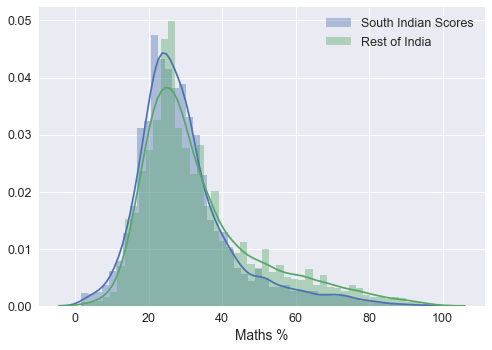

In [52]:
fig, ax = plt.subplots()
sns.distplot(a=Maths.loc[Maths['South Indian']==1]['Maths %'],ax=ax,label = 'South Indian Scores')
sns.distplot(a=Maths.loc[Maths['South Indian']==0]['Maths %'],ax=ax,label='Rest of India')
ax.legend()
plt.show()

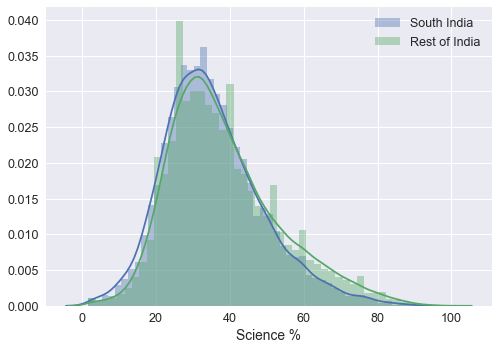

In [53]:
fig, ax = plt.subplots()
sns.distplot(a=Science.loc[Science['South Indian']==1]['Science %'],ax=ax,label='South India')
sns.distplot(a=Science.loc[Science['South Indian']==0]['Science %'],ax=ax,label='Rest of India')
ax.legend()
plt.show()

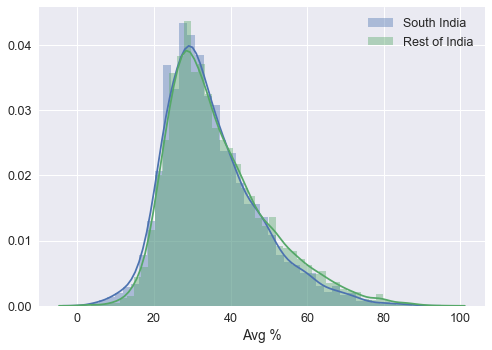

In [54]:
fig, ax = plt.subplots()
sns.distplot(a=Maths_and_Science.loc[Maths_and_Science['South Indian']==1]['Avg %'],ax=ax,label='South India')
sns.distplot(a=Maths_and_Science.loc[Maths_and_Science['South Indian']==0]['Avg %'],ax=ax,label='Rest of India')
ax.legend()
plt.show()

From these graphs, I don't think we can conclude that students in South Indian States are extraordinarily gifted or perform significantly better in maths and science, in fact the opposite seems to be the case in maths, even if the science scores are very similar.